In [1]:
# COLLAPSE CELL
# AMsearch np.v*
#x = data['mass']
#x?

# from jupyterthemes import jtplot
# jtplot.style(theme='solarized')
# from jupyterlab_table import JSONTable
# JSONTable(df)

from pprint import pprint
import math
import statsmodels.stats as sms
import statsmodels.api as sm
import statsmodels.regression as smr
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# 04atplotlib inline
# %load_ext heat

plt.ion()
# plt.ioff()

# %heat

import os 
# dir_path = os.path.dirname(os.path.realpath(__file__))
cwd = os.getcwd()

# fig, ax = plt.subplots()
# ax.plot(x, y)

/Users/tomwong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import src.roc_curve as rc

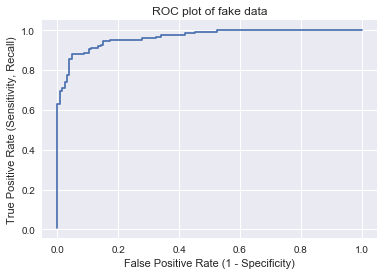

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = rc.roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()

In [6]:
import pandas as pd

df = pd.read_csv('data/grad.csv')

In [8]:
print(df.describe())

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


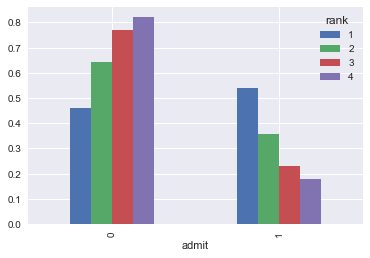

In [9]:
admit = pd.crosstab(df['admit'], df['rank'], rownames=['admit'])
(admit / admit.apply(sum)).plot(kind="bar")
plt.show()

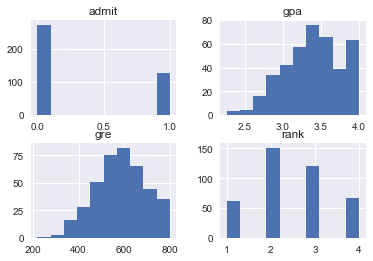

In [11]:
df.hist()
plt.show()

In [12]:
print(df['admit'].value_counts() / len(df))

0    0.6825
1    0.3175
Name: admit, dtype: float64


### NOTE: Galvanize's solution does not work. Class's workaround per the github issue.
- Github issue: https://github.com/statsmodels/statsmodels/issues/3931

In [15]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [53]:
X = df[['gre', 'gpa', 'rank']].values
X_const = add_constant(X, prepend=True)
y = df['admit'].values


In [55]:
import statsmodels.api as sm
import statsmodels.tools as t
y = df['admit']
X = df.drop('admit', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = sm.Logit(endog=y, exog= X)
fm = model.fit()
fm.summary()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Apr 2018   Pseudo R-squ.:                 0.06176
Time:                        10:39:58   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 1.971e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155      -0.001       0.004
gpa           -0.0042      0.201     -0.021      0.983      -0.398       0.390
rank          -0.6695      0.121     -5.527      0.000      -0.907      -0.432
==============================================================================
"""

In [56]:
X = df[['gre', 'gpa', 'rank']].values
X_const = add_constant(X, prepend=True)
y = df['admit'].values

In [57]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

kfold = KFold(len(y))

accuracies = []
precisions = []
recalls = []

for train_index, test_index in kfold:
    model = LogisticRegression()
    model.fit(X[train_index], y[train_index])
    y_predict = model.predict(X[test_index])
    y_true = y[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print ("accuracy:", np.average(accuracies))
print ("precision:", np.average(precisions))
print ("recall:", np.average(recalls))

accuracy: 0.717409194628362
precision: 0.677056277056277
recall: 0.2343663371167263


In [61]:
# from itertools import izip <-- !!! Python 2

model = LogisticRegression()
model.fit(X, y)

for name, coef in zip(df.columns[1:], model.coef_[0]):
    print("%s: %.4f" % (name, coef))

gre: 0.0019
gpa: 0.3193
rank: -0.6054


In [62]:
from math import exp

for i, coef in enumerate(model.coef_[0]):
    print ("beta%d: %.5f" % (i + 1, exp(coef)))


beta1: 1.00189
beta2: 1.37614
beta3: 0.54587


In [63]:
from math import log

for i, coef in enumerate(model.coef_[0]):
    print ("beta%d: %.5f" % (i + 1, log(2) / coef))


beta1: 367.28218
beta2: 2.17093
beta3: -1.14499


In [64]:
gre = df['gre'].mean()
gpa = df['gpa'].mean()
feature_matrix = []
ranks = [1, 2, 3, 4]
for rank in ranks:
    feature_matrix.append([gre, gpa, rank])
X_rank = np.array(feature_matrix)

In [67]:
probabilities_rank = model.predict_proba(X_rank)[:, 1]
for rank, prob in zip(ranks, probabilities_rank):
    print ("rank: %d, probability: %f, odds: %f" % (rank, prob, prob / (1 - prob)))

rank: 1, probability: 0.518633, odds: 1.077417
rank: 2, probability: 0.370328, odds: 0.588129
rank: 3, probability: 0.243022, odds: 0.321042
rank: 4, probability: 0.149115, odds: 0.175247


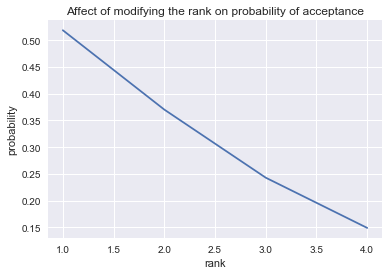

In [68]:
plt.plot(ranks, probabilities_rank)
plt.xlabel("rank")
plt.ylabel("probability")
plt.title("Affect of modifying the rank on probability of acceptance")
plt.show()

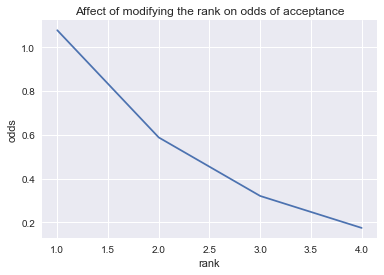

In [69]:
odds_rank = probabilities_rank / (1 - probabilities_rank)
plt.plot(ranks, odds_rank)
plt.xlabel("rank")
plt.ylabel("odds")
plt.title("Affect of modifying the rank on odds of acceptance")
plt.show()

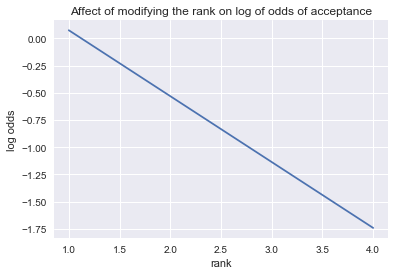

In [70]:
plt.plot(ranks, np.log(odds_rank))
plt.xlabel("rank")
plt.ylabel("log odds")
plt.title("Affect of modifying the rank on log of odds of acceptance")
plt.show()

In [73]:
gpa = df['gpa'].mean()
rank = df['rank'].mean()
feature_matrix = []
gres = range(df['gre'].min(), df['gre'].max() + 1)
for gre in gres:
    feature_matrix.append([gre, gpa, rank])
X_gre = np.array(feature_matrix)

probabilities_gre = model.predict_proba(X_gre)[:, 1]
for gre, prob in zip(gres, probabilities_gre):
    print ("gre: %d, probability: %f, odds: %f" % (gre, prob, prob / (1 - prob)))


gre: 220, probability: 0.179704, odds: 0.219073
gre: 221, probability: 0.179983, odds: 0.219487
gre: 222, probability: 0.180262, odds: 0.219901
gre: 223, probability: 0.180541, odds: 0.220317
gre: 224, probability: 0.180820, odds: 0.220733
gre: 225, probability: 0.181100, odds: 0.221150
gre: 226, probability: 0.181380, odds: 0.221568
gre: 227, probability: 0.181660, odds: 0.221986
gre: 228, probability: 0.181941, odds: 0.222405
gre: 229, probability: 0.182222, odds: 0.222826
gre: 230, probability: 0.182503, odds: 0.223247
gre: 231, probability: 0.182785, odds: 0.223668
gre: 232, probability: 0.183067, odds: 0.224091
gre: 233, probability: 0.183350, odds: 0.224514
gre: 234, probability: 0.183632, odds: 0.224938
gre: 235, probability: 0.183915, odds: 0.225363
gre: 236, probability: 0.184199, odds: 0.225789
gre: 237, probability: 0.184483, odds: 0.226215
gre: 238, probability: 0.184767, odds: 0.226643
gre: 239, probability: 0.185051, odds: 0.227071
gre: 240, probability: 0.185336, odds: 0

gre: 752, probability: 0.374176, odds: 0.597893
gre: 753, probability: 0.374618, odds: 0.599023
gre: 754, probability: 0.375060, odds: 0.600154
gre: 755, probability: 0.375503, odds: 0.601288
gre: 756, probability: 0.375945, odds: 0.602424
gre: 757, probability: 0.376388, odds: 0.603562
gre: 758, probability: 0.376831, odds: 0.604702
gre: 759, probability: 0.377275, odds: 0.605844
gre: 760, probability: 0.377718, odds: 0.606989
gre: 761, probability: 0.378162, odds: 0.608135
gre: 762, probability: 0.378606, odds: 0.609284
gre: 763, probability: 0.379050, odds: 0.610435
gre: 764, probability: 0.379494, odds: 0.611588
gre: 765, probability: 0.379939, odds: 0.612743
gre: 766, probability: 0.380383, odds: 0.613901
gre: 767, probability: 0.380828, odds: 0.615061
gre: 768, probability: 0.381273, odds: 0.616223
gre: 769, probability: 0.381719, odds: 0.617387
gre: 770, probability: 0.382164, odds: 0.618553
gre: 771, probability: 0.382610, odds: 0.619721
gre: 772, probability: 0.383056, odds: 0

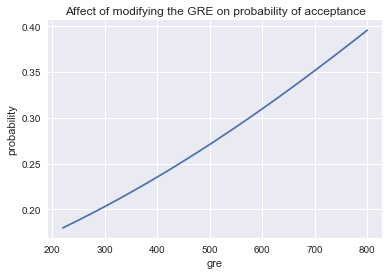

In [74]:
plt.plot(gres, probabilities_gre)
plt.xlabel("gre")
plt.ylabel("probability")
plt.title("Affect of modifying the GRE on probability of acceptance")
plt.show()

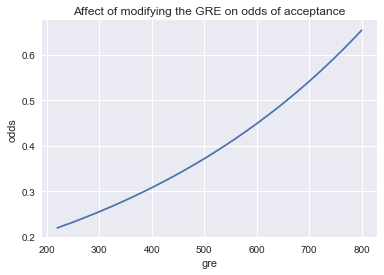

In [75]:
odds_gre = probabilities_gre / (1 - probabilities_gre)
plt.plot(gres, odds_gre)
plt.xlabel("gre")
plt.ylabel("odds")
plt.title("Affect of modifying the GRE on odds of acceptance")
plt.show()

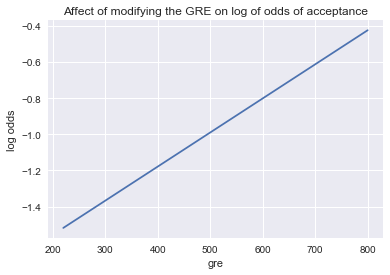

In [76]:
plt.plot(gres, np.log(odds_gre))
plt.xlabel("gre")
plt.ylabel("log odds")
plt.title("Affect of modifying the GRE on log of odds of acceptance")
plt.show()

In [79]:
gre = df['gre'].mean()
rank = df['rank'].mean()
feature_matrix = []
gpas = range(int(np.floor(df['gpa'].min())), int(np.ceil(df['gpa'].max() + 1)))
for gpa in gpas:
    feature_matrix.append([gre, gpa, rank])
X_gpa = np.array(feature_matrix)

probabilities_gpa = model.predict_proba(X_gpa)[:, 1]
for gpa, prob in zip(gpas, probabilities_gpa):
    print ("gpa: %d, probability: %f, odds: %f" % (gpa, prob, prob / (1 - prob)))

gpa: 2, probability: 0.219567, odds: 0.281340
gpa: 3, probability: 0.279105, odds: 0.387165
gpa: 4, probability: 0.347597, odds: 0.532795


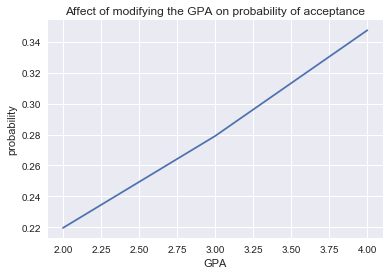

In [80]:
plt.plot(gpas, probabilities_gpa)
plt.xlabel("GPA")
plt.ylabel("probability")
plt.title("Affect of modifying the GPA on probability of acceptance")
plt.show()

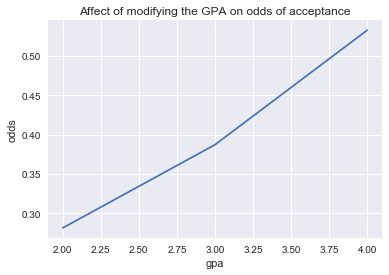

In [81]:
odds_gpa = probabilities_gpa / (1 - probabilities_gpa)
plt.plot(gpas, odds_gpa)
plt.xlabel("gpa")
plt.ylabel("odds")
plt.title("Affect of modifying the GPA on odds of acceptance")
plt.show()

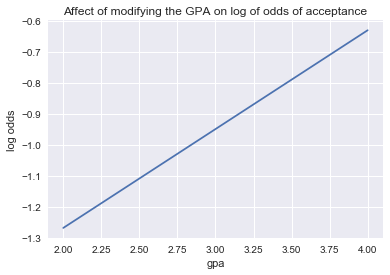

In [82]:
plt.plot(gpas, np.log(odds_gpa))
plt.xlabel("gpa")
plt.ylabel("log odds")
plt.title("Affect of modifying the GPA on log of odds of acceptance")
plt.show()